### Загрузка данных

In [1]:
import bs4
import requests
import string
import dask.bag as db
from dask.distributed import Client
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pymorphy2_311_hotfix():
    from inspect import getfullargspec
    from pymorphy2.units.base import BaseAnalyzerUnit

    def _get_param_names_311(klass):
        if klass.__init__ is object.__init__:
            return []
        args = getfullargspec(klass.__init__).args
        return sorted(args[1:])

    setattr(BaseAnalyzerUnit, '_get_param_names', _get_param_names_311)


url = "http://www.lib.ru/MEMUARY/CHECHNYA/byloe.txt"
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text, 'lxml')
text = soup.body.get_text(' ', strip=True)


### Обработка текста

In [2]:
words_list = text.lower().translate(str.maketrans('', '', string.punctuation)).translate(str.maketrans('', '', string.digits)).split()
len(words_list)

130364

In [3]:
pymorphy2_311_hotfix()
morph = pymorphy2.MorphAnalyzer()

In [4]:
def process_text_v2(word, morph):
    #pymorphy2_311_hotfix()
    #morph = pymorphy2.MorphAnalyzer()
    lemmatized_words = morph.parse(word)[0].normal_form
    return lemmatized_words #[word for word in lemmatized_words if len(word) >= 3]

In [5]:
lemmatized_words = [morph.parse(word)[0].normal_form for word in words_list if len(word) >= 3]
#lemmatized_words = [process_text_v2(word, morph) for word in words_list if len(word) >= 3]

### Определить 10 самых часто встречающихся слов

In [6]:
data = pd.DataFrame(lemmatized_words, columns=["words"])
words_count = data['words'].value_counts().reset_index()
words_count.columns = ['word', 'count']
words_count.head(10)

,word,count
0,что,1789
1,быть,1632
2,как,976
3,это,960
4,всё,893
5,мы,872
6,он,833
7,они,723
8,свой,696
9,я,643


### Построить гистограмму распределения

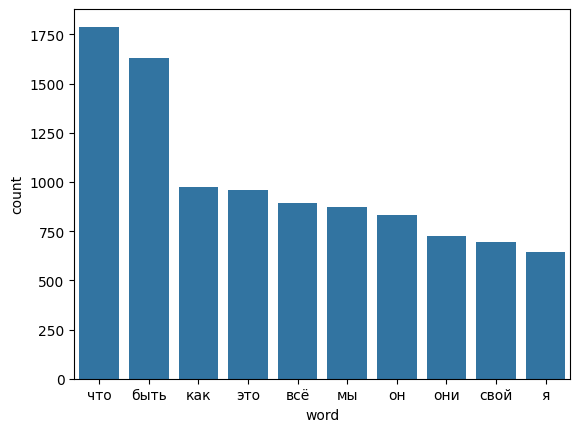

In [7]:
sns.barplot(words_count.head(10), x='word', y='count')
plt.show()